In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split

In [2]:
# Read Data Files
cardio_dataset_raw = pd.read_csv("../input/cardio_train.csv",sep=";")

print("Dataset memiliki " + str(len(cardio_dataset_raw)) + " baris dan " + str(len(cardio_dataset_raw.columns)) + " kolom")
print()
print(cardio_dataset_raw.head())

Dataset memiliki 70000 baris dan 13 kolom

   id    age  gender  height  weight   ...    gluc  smoke  alco  active  cardio
0   0  18393       2     168    62.0   ...       1      0     0       1       0
1   1  20228       1     156    85.0   ...       1      0     0       1       1
2   2  18857       1     165    64.0   ...       1      0     0       0       1
3   3  17623       2     169    82.0   ...       1      0     0       1       1
4   4  17474       1     156    56.0   ...       1      0     0       0       0

[5 rows x 13 columns]


In [3]:
# Cek semua deskripsi label pada dataset

for i in range(len(cardio_dataset_raw.columns)):
    print(cardio_dataset_raw[cardio_dataset_raw.columns[i]].describe())
    print()

count    70000.000000
mean     49972.419900
std      28851.302323
min          0.000000
25%      25006.750000
50%      50001.500000
75%      74889.250000
max      99999.000000
Name: id, dtype: float64

count    70000.000000
mean     19468.865814
std       2467.251667
min      10798.000000
25%      17664.000000
50%      19703.000000
75%      21327.000000
max      23713.000000
Name: age, dtype: float64

count    70000.000000
mean         1.349571
std          0.476838
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          2.000000
Name: gender, dtype: float64

count    70000.000000
mean       164.359229
std          8.210126
min         55.000000
25%        159.000000
50%        165.000000
75%        170.000000
max        250.000000
Name: height, dtype: float64

count    70000.000000
mean        74.205690
std         14.395757
min         10.000000
25%         65.000000
50%         72.000000
75%         82.000000
max        200.000000
Name: w

In [4]:
# Cek semua label, lihat apakah terdapat NULL
for i in range(len(cardio_dataset_raw.columns)):
    print("Label " + cardio_dataset_raw.columns[i] + " memiliki " + str(cardio_dataset_raw[cardio_dataset_raw.columns[i]].isnull().sum()) + " data kosong")

Label id memiliki 0 data kosong
Label age memiliki 0 data kosong
Label gender memiliki 0 data kosong
Label height memiliki 0 data kosong
Label weight memiliki 0 data kosong
Label ap_hi memiliki 0 data kosong
Label ap_lo memiliki 0 data kosong
Label cholesterol memiliki 0 data kosong
Label gluc memiliki 0 data kosong
Label smoke memiliki 0 data kosong
Label alco memiliki 0 data kosong
Label active memiliki 0 data kosong
Label cardio memiliki 0 data kosong


In [6]:
# Cek data outlier pada setiap label menggunakan IQR (InterQuartile Range)

copy_of_cardio_dataset_raw = cardio_dataset_raw.copy()

# Menentukan label apa saja yang ingin dicek outliernya. Yang dicek hanyalah label yang bersifat numerical (bukan categorical maupun identifier)
check_outlier_column = ['age','height','weight','ap_hi','ap_lo']

row_with_outlier = []

# Cek IQR pada semua label
Q1 = copy_of_cardio_dataset_raw.quantile(0.25)
Q3 = copy_of_cardio_dataset_raw.quantile(0.75)

IQR = Q3 - Q1
rangeBawah = (Q1 - 1.5 * IQR) // 1
rangeAtas = (Q3 + 1.5 * IQR) // 1

for i in range(len(check_outlier_column)):
    countOutlier = 0
    for j in range(len(copy_of_cardio_dataset_raw)):
        
        #Cek apakah data lebih kecil dari Q1 - 1.5 * IQR
        if(copy_of_cardio_dataset_raw.loc[j][check_outlier_column[i]] < rangeBawah[check_outlier_column[i]]): 
            countOutlier = countOutlier + 1
            row_with_outlier.append(j)
        
        #Cek apakah data lebih besar dari Q3 + 1.5 * IQR
        elif(copy_of_cardio_dataset_raw.loc[j][check_outlier_column[i]] > rangeAtas[check_outlier_column[i]]):
            countOutlier = countOutlier + 1
            row_with_outlier.append(j)
            
    print("Label " + check_outlier_column[i] + " memiliki " + str(countOutlier) + " data outlier")

Label age memiliki 4 data outlier
Label height memiliki 490 data outlier
Label weight memiliki 1810 data outlier
Label ap_hi memiliki 1435 data outlier
Label ap_lo memiliki 4632 data outlier


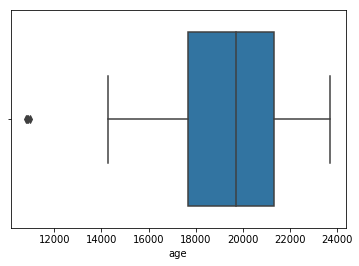

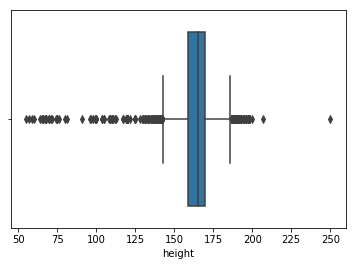

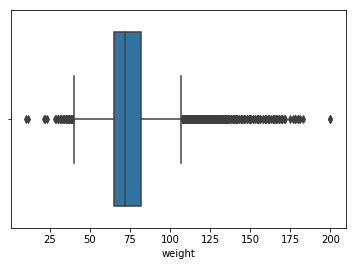

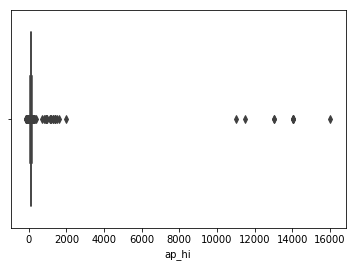

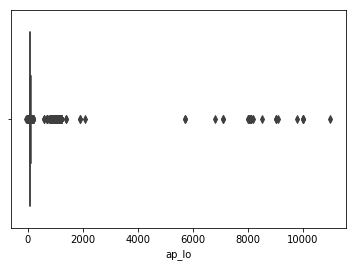

In [7]:
# Cek outlier menggunakan boxplot
import seaborn as sns
import matplotlib.pyplot as plt
for col in check_outlier_column:
    sns.boxplot(x=copy_of_cardio_dataset_raw[col])
    plt.show()

In [8]:
# Cek row yang memiliki outlier, hapus row duplikasi, kemudian sort row dari terbesar ke terkecil
row_with_outlier = list(dict.fromkeys(row_with_outlier))

# Sort row dari terbesar ke terkecil
for i in range(len(row_with_outlier)):
    swap = i + np.argmax(row_with_outlier[i:])
    (row_with_outlier[i], row_with_outlier[swap]) = (row_with_outlier[swap], row_with_outlier[i])

print(row_with_outlier)


[69997, 69996, 69981, 69978, 69967, 69947, 69946, 69937, 69932, 69929, 69922, 69894, 69885, 69878, 69877, 69873, 69872, 69863, 69854, 69851, 69841, 69830, 69827, 69823, 69784, 69771, 69719, 69708, 69699, 69673, 69668, 69638, 69635, 69631, 69622, 69595, 69593, 69589, 69587, 69586, 69579, 69571, 69552, 69549, 69545, 69532, 69511, 69504, 69490, 69487, 69480, 69475, 69440, 69434, 69430, 69429, 69422, 69405, 69390, 69378, 69370, 69360, 69355, 69329, 69320, 69319, 69313, 69306, 69303, 69302, 69295, 69291, 69287, 69286, 69282, 69274, 69265, 69255, 69233, 69217, 69216, 69205, 69197, 69162, 69158, 69137, 69124, 69122, 69116, 69115, 69109, 69105, 69101, 69081, 69076, 69069, 69067, 69063, 69060, 69053, 69052, 69023, 69012, 68998, 68987, 68971, 68967, 68958, 68957, 68956, 68943, 68933, 68921, 68917, 68900, 68895, 68888, 68885, 68872, 68842, 68835, 68826, 68821, 68814, 68796, 68780, 68776, 68758, 68753, 68745, 68744, 68742, 68741, 68737, 68716, 68706, 68699, 68694, 68688, 68669, 68668, 68667, 68665

In [10]:
cleaned_cardio_dataset = copy_of_cardio_dataset_raw.copy().drop(row_with_outlier, axis=0)

print("Dataset memiliki " + str(len(cleaned_cardio_dataset)) + " baris dan " + str(len(cleaned_cardio_dataset.columns)) + " kolom")
print()
print(cleaned_cardio_dataset.head(5))

Dataset memiliki 62532 baris dan 13 kolom

   id    age  gender  height  weight   ...    gluc  smoke  alco  active  cardio
0   0  18393       2     168    62.0   ...       1      0     0       1       0
1   1  20228       1     156    85.0   ...       1      0     0       1       1
2   2  18857       1     165    64.0   ...       1      0     0       0       1
3   3  17623       2     169    82.0   ...       1      0     0       1       1
5   8  21914       1     151    67.0   ...       2      0     0       0       0

[5 rows x 13 columns]


Pearson’s Correlation Coefficient helps you find out the relationship between two quantities. It gives you the measure of the strength of association between two variables. The value of Pearson’s Correlation Coefficient can be between -1 to +1.

1 means that they are highly correlated and 0 means no correlation. -1 means that there is a negative correlation. Think of it as an inverse proportion.

https://www.statisticssolutions.com/correlation-pearson-kendall-spearman/

<function matplotlib.pyplot.show(*args, **kw)>

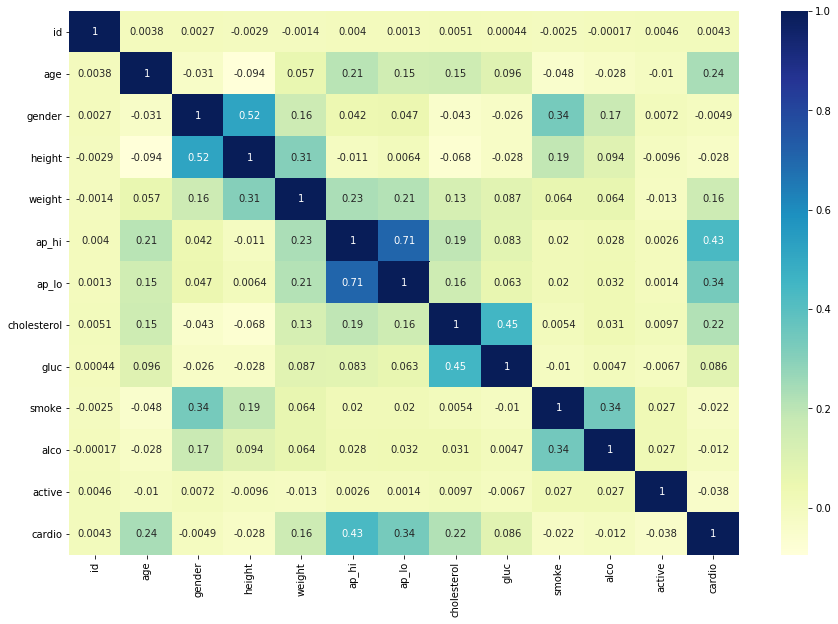

In [11]:
sns.heatmap(cleaned_cardio_dataset.corr(),annot=True,cmap='YlGnBu')
fig=plt.gcf()
fig.set_size_inches(15,10)
plt.show

Kami akan mengambil cardio sebagai label, dan menentukan fitur berdasarkan plotting correlation dengan metode Pearson di atas. Dari plotting tersebut, kami memutuskan untuk memilih age, weight, ap_hi, ap_lo, dan chole

In [12]:
final_cardio = cleaned_cardio_dataset.copy().drop(columns=['id', 'gender', 'height', 'smoke', 'alco', 'active'])
final_cardio.head(5)

,age,weight,ap_hi,ap_lo,cholesterol,gluc,cardio
0,18393,62.0,110,80,1,1,0
1,20228,85.0,140,90,3,1,1
2,18857,64.0,130,70,3,1,1
3,17623,82.0,150,100,1,1,1
5,21914,67.0,120,80,2,2,0


In [13]:
final_cardio.describe()

,age,weight,ap_hi,ap_lo,cholesterol,gluc,cardio
count,62532.000000,62532.000000,62532.000000,62532.000000,62532.000000,62532.000000,62532.000000
mean,19493.961332,73.173645,126.421336,81.699290,1.357673,1.220655,0.493971
std,2458.047517,12.277918,14.292588,7.673729,0.675137,0.567597,0.499968
min,14282.000000,39.000000,90.000000,65.000000,1.000000,1.000000,0.000000
25%,17725.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000
50%,19718.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000
75%,21342.000000,81.000000,140.000000,90.000000,1.000000,1.000000,1.000000
max,23713.000000,107.000000,170.000000,105.000000,3.000000,3.000000,1.000000


In [15]:
y_cardio = final_cardio['cardio']
x_cardio = final_cardio.drop('cardio', axis=1)

In [16]:
y_cardio.head(5)

0    0
1    1
2    1
3    1
5    0
Name: cardio, dtype: int64

In [17]:
x_cardio.head(5)

,age,weight,ap_hi,ap_lo,cholesterol,gluc
0,18393,62.0,110,80,1,1
1,20228,85.0,140,90,3,1
2,18857,64.0,130,70,3,1
3,17623,82.0,150,100,1,1
5,21914,67.0,120,80,2,2


In [19]:
x_train, x_test, y_train, y_test = train_test_split(x_cardio, y_cardio, test_size=0.3)

In [20]:
print("Data training {}, data testing {}".format(x_train.shape, x_test.shape))

Data training (43772, 6), data testing (18760, 6)


In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [22]:
for col in x_train.columns:
    x_train[col] = scaler.fit_transform(np.array(x_train[col]).reshape(-1,1))
x_train.head()

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

,age,weight,ap_hi,ap_lo,cholesterol,gluc
464,-1.746061,2.018792,-0.452446,-0.221880,-0.529972,-0.388679
28555,-0.787650,-0.262563,-0.452446,-0.221880,-0.529972,-0.388679
400,-0.529367,-0.914379,-0.452446,-0.221880,-0.529972,-0.388679
10722,-0.883491,0.307776,1.651493,1.084727,0.951283,-0.388679
50254,1.203083,-0.914379,2.002150,1.084727,2.432538,3.139216


In [23]:
for col in x_train.columns:
    x_test[col] = scaler.fit_transform(np.array(x_test[col]).reshape(-1,1))
x_test.head()

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

,age,weight,ap_hi,ap_lo,cholesterol,gluc
34915,1.573819,0.971767,-0.441971,-0.220442,-0.529339,-0.388936
1223,-1.500008,-1.795304,-1.833750,-1.515658,0.951705,1.367973
15394,0.618661,-0.004846,0.949807,-1.515658,-0.529339,-0.388936
29484,-1.466508,0.402076,-0.441971,-0.220442,-0.529339,-0.388936
31077,0.711399,0.890383,-1.137861,-1.515658,-0.529339,3.124882


In [26]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()
abc.fit(x_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [27]:
print("Random Forest Classifier - Accuracy: ", rfc.score(x_test, y_test))
print("Ada Boost Classifier - Accuracy: ", abc.score(x_test, y_test))

Random Forest Classifier - Accuracy:  0.6745202558635395
Ada Boost Classifier - Accuracy:  0.7216950959488273


Benchmarking for the Accuracies

In [28]:
np.unique(y_test)

array([0, 1])

In [29]:
((y_train == 0).sum() + (y_test == 0).sum()) / final_cardio.shape[0]

0.5060289131964434

In [30]:
((y_train == 1).sum() + (y_test == 1).sum()) / final_cardio.shape[0]

0.49397108680355656